In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def F(x: np.array) -> np.array:
    n = x.size
    f = np.ndarray(n)

    f[0] = 6*x[0] - 2*np.cos(x[1]*x[2]) - 2*x[3]
    f[1] = x[0]**2 - 81*(x[1]+0.1)**2 + 2*x[3]*np.sin(x[2]) + 1.06
    f[2] = np.exp(-1*x[0]*x[1]) + 20*x[2] + (10/3)*np.pi - 4*x[3]**2
    f[3] = (x[0]-0.5)**2 + np.sin(x[1]*x[2]) + 10*x[3] -5

    return f


def DF(x: np.array) -> np.array:
    h = 10e-5
    n = x.size
    J = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            xh = x.copy()
            xh[j] += h
            y = F(x)[i]
            yh = F(xh)[i]
            J[i,j] = (yh - y)/h

    return J

x = np.array([1.0,1.0,1.0,1.0])
f = F(x)
Jf = DF(x)
x1 = np.linalg.solve(Jf,f)
print(f)
print(Jf)
print(x1)

[  2.91939539 -94.26705803  26.83985495   6.09147098]
[[   6.            1.682996      1.682996     -2.        ]
 [   2.0001     -178.2081        1.08052046    1.68294197]
 [  -0.36786105   -0.36786105   20.           -8.0004    ]
 [   1.0001        0.54026023    0.54026023   10.        ]]
[0.06281144 0.54369473 1.54907849 0.48980111]


[ 5.00000000e-01  9.92241021e-10 -5.23598776e-01  5.00000000e-01]
[ 0.4945913  -0.19994123 -0.53089306  0.48940226]
[ 5.00000000e-01  6.89835379e-11 -5.23598776e-01  5.00000000e-01]
[-29.01641018   0.35662696 -64.24569703 -86.71340885]
[ 5.00000000e-01  7.25716297e-11 -5.23598776e-01  5.00000000e-01]


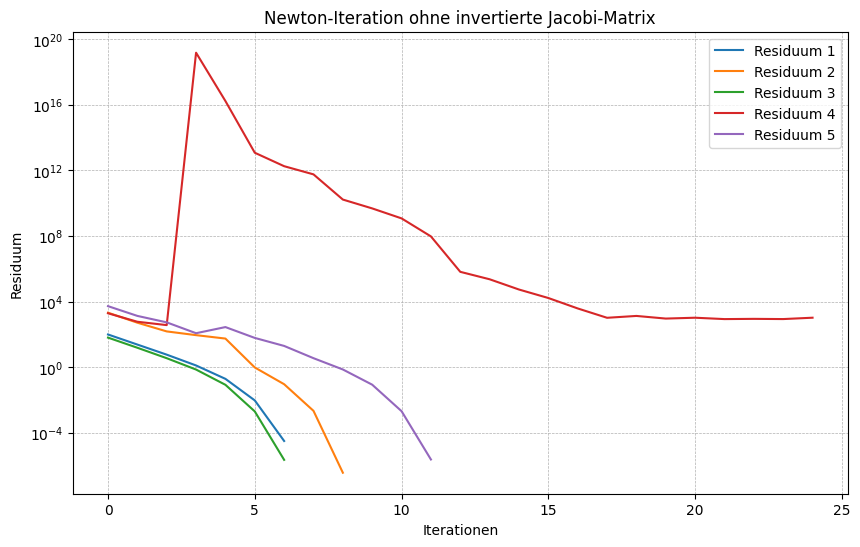

In [56]:
werte = {
    "r1": list(),
    "r2": list(),
    "r3": list(),
    "r4": list(),
    "r5": list()
}

def newton(x0: np.array, tol: float, max_iter: int, func_code: str) -> tuple:
    x = np.array(x0.size)
    for i in range(max_iter):
        Jf = DF(x0)
        f = F(x0)
        werte[func_code].append(np.linalg.norm(f))
        b = np.linalg.solve(Jf,f)
        x = x0-b

        if np.linalg.norm(x - x0) < tol:
            break

        x0 = x

    return x

tol = 10e-6
max_iter = 25
x = np.array([[1.0, 1.0, 1.0, 1.0],
             [5.0, 5.0, 5.0, 5.0],
             [1.5, 0.8, 0.5, 1.5],
             [5.5, 4.8, 4.5, 5.5],
             [8.0, 8.0, 8.0, 8.0]])

print(newton(x[0,:], tol, max_iter, "r1"))
print(newton(x[1,:], tol, max_iter, "r2"))
print(newton(x[2,:], tol, max_iter, "r3"))
print(newton(x[3,:], tol, max_iter, "r4"))
print(newton(x[4,:], tol, max_iter, "r5"))

plt.figure(figsize=(10, 6))
plt.plot(werte["r1"], label="Residuum 1")
plt.plot(werte["r2"], label="Residuum 2")
plt.plot(werte["r3"], label="Residuum 3")
plt.plot(werte["r4"], label="Residuum 4")
plt.plot(werte["r5"], label="Residuum 5")
plt.xlabel("Iterationen")
plt.ylabel("Residuum")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.title("Newton-Iteration ohne invertierte Jacobi-Matrix")
plt.show()
